## Hyphotesis ##
- " Given the current state of the table and psat seasons, what's the realistic probability that each team could still win? "

1. Who is most likely to win 2025-2026 LaLiga this year based on previous 10 years
2. Who are the 2 teams that will most likely be relegated
3. Who is the team that will most likely go to conference leagus (7th position)

In [1]:
import pandas as pd

full_data = pd.read_csv("la_liga_data_2014_2025.csv")
print(full_data.shape)
full_data.tail(20)

(220, 20)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
200,1,Barcelona,38,28,4,6,102,39,63,88,2.32,45953.0,Robert Lewandowski - 27,Iñaki Peña,→ Champions League via league finish,2024,91.5,41.9,49.5,1.30
201,2,Real Madrid,38,26,6,6,78,38,40,84,2.21,69807.0,Kylian Mbappé - 31,Thibaut Courtois,→ Champions League via league finish,2024,75.3,42.8,32.5,0.86
202,3,Atlético Madrid,38,22,10,6,68,30,38,76,2.00,60883.0,Alexander Sørloth - 20,Jan Oblak,→ Champions League via league finish,2024,64.6,33.4,31.2,0.82
203,4,Athletic Club,38,19,13,6,54,29,25,70,1.84,48420.0,Oihan Sancet - 15,Unai Simón,→ Champions League via league finish,2024,53.0,37.8,15.2,0.40
204,5,Villarreal,38,20,10,8,71,51,20,70,1.84,18266.0,Ayoze Pérez - 19,Diego Conde,→ Champions League via league finish,2024,64.8,44.4,20.4,0.54
205,6,Betis,38,16,12,10,57,50,7,60,1.58,51542.0,Isco - 9,Adrián,→ Europa League via league finish,2024,54.7,50.6,4.1,0.11
206,7,Celta Vigo,38,16,7,15,59,57,2,55,1.45,21504.0,Borja Iglesias - 11,Vicente Guaita,→ Europa League via league finish,2024,54.2,43.4,10.9,0.29
207,8,Rayo Vallecano,38,13,13,12,41,45,-4,52,1.37,12908.0,Jorge de Frutos - 6,Augusto Batalla,→ Conference League via league finish,2024,45.4,49.0,-3.5,-0.09
208,9,Osasuna,38,12,16,10,48,52,-4,52,1.37,20476.0,Ante Budimir - 21,Sergio Herrera,NaN,2024,44.0,53.7,-9.7,-0.25
209,10,Mallorca,38,13,9,16,35,44,-9,48,1.26,18502.0,"Cyle Larin, Vedat Muriqi - 7",Dominik Greif,NaN,2024,38.8,46.8,-8.1,-0.21


## Data Exploration

In [2]:
# Nbumber of appearances for the past 12 seasons inculding the 2025-2026 season which is not yet complete
# if belows 12 then the team was relegated at some point
full_data['squad'].value_counts()

squad
Barcelona          11
Villarreal         11
Real Madrid        11
Celta Vigo         11
Athletic Club      11
Real Sociedad      11
Sevilla            11
Valencia           11
Atlético Madrid    11
Betis              10
Getafe             10
Espanyol            9
Alavés              8
Levante             7
Rayo Vallecano      7
Granada             7
Eibar               7
Osasuna             7
Valladolid          5
Girona              5
Mallorca            5
Las Palmas          5
Leganés             5
La Coruña           4
Elche               4
Málaga              4
Cádiz               4
Almería             3
Sporting Gijón      2
Huesca              2
Córdoba             1
Name: count, dtype: int64

In [3]:
# Top3 ranking count per team
full_data['squad'].groupby(full_data['rk']).value_counts().head(10)

rk  squad          
1   Barcelona          6
    Real Madrid        4
    Atlético Madrid    1
2   Real Madrid        5
    Barcelona          4
    Atlético Madrid    2
3   Atlético Madrid    7
    Real Madrid        2
    Barcelona          1
    Girona             1
Name: count, dtype: int64

In [4]:
import plotly.express as px 

# Get one top 3 ranks only
ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name='count')

# Keep only top 3 ranks (optional if you're sure it's only top3)
ranking_counts = ranking_counts[ranking_counts['rk'].isin([1, 2, 3])] ## 7, 8, 9

# Plot
fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by the Team and Rank (Last 10 years)',
             labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Rank'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
     

In [5]:
full_data.describe()

,rk,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,season,xg,xga,xgd,xgd/90
count,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000,220.00000,220.000000,204.000000,220.000000,160.00000,160.000000,160.000000,160.000000
mean,10.500000,38.0,14.063636,9.872727,14.063636,49.900000,49.900000,0.00000,52.05000,1.370000,26453.098039,2019.000000,48.84250,48.843750,0.000000,-0.000312
std,5.779431,0.0,6.214987,2.914643,5.476854,17.750915,13.141277,26.75391,17.47411,0.459624,18088.531993,3.169489,11.62082,8.621326,17.129878,0.450948
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,18.000000,-64.00000,16.00000,0.420000,91.000000,2014.000000,29.30000,32.500000,-33.000000,-0.870000
25%,5.750000,38.0,10.000000,8.000000,10.000000,38.000000,41.000000,-17.00000,41.00000,1.080000,13677.500000,2016.000000,40.57500,42.875000,-11.000000,-0.290000
50%,10.500000,38.0,13.000000,10.000000,15.000000,46.000000,50.000000,-6.00000,48.50000,1.275000,19957.000000,2019.000000,45.85000,48.300000,-3.150000,-0.080000
75%,15.250000,38.0,17.250000,12.000000,18.000000,57.000000,58.000000,13.00000,61.00000,1.610000,37320.500000,2022.000000,53.97500,54.425000,11.000000,0.292500
max,20.000000,38.0,30.000000,18.000000,30.000000,118.000000,94.000000,89.00000,95.00000,2.500000,83498.000000,2024.000000,91.50000,76.200000,49.500000,1.300000


In [6]:
###### Winning teams of the past 10 years

# Filter the dataset fot teams that finished 1st each season
winning_teams = full_data[full_data["rk"] == 1][["season", "squad", "pts", "pts/mp", "gd"]].sort_values("season")

#Display the results
print(winning_teams)

     season            squad  pts  pts/mp  gd
0      2014        Barcelona   94    2.47  89
20     2015        Barcelona   91    2.39  83
40     2016      Real Madrid   93    2.45  65
60     2017        Barcelona   93    2.45  70
80     2018        Barcelona   87    2.29  54
100    2019      Real Madrid   87    2.29  45
120    2020  Atlético Madrid   86    2.26  42
140    2021      Real Madrid   86    2.26  49
160    2022        Barcelona   88    2.32  50
180    2023      Real Madrid   95    2.50  61
200    2024        Barcelona   88    2.32  63


In [7]:
full_data.head(10)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
0,1,Barcelona,38,30,4,4,110,21,89,94,2.47,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,2014,NaN,NaN,NaN,NaN
1,2,Real Madrid,38,30,2,6,118,38,80,92,2.42,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
2,3,Atlético Madrid,38,23,9,6,67,29,38,78,2.05,46454.0,Antoine Griezmann - 22,Miguel Ángel Moyá,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
3,4,Valencia,38,22,11,5,70,32,38,77,2.03,43125.0,Daniel Parejo - 12,Diego Alves,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
4,5,Sevilla,38,23,7,8,71,45,26,76,2.00,30878.0,Carlos Bacca - 20,Sergio Rico,→ Champions League via Europa League win,2014,NaN,NaN,NaN,NaN
5,6,Villarreal,38,16,12,10,48,37,11,60,1.58,16375.0,Luciano Vietto - 12,Sergio Asenjo,→ Europa League via league finish 1,2014,NaN,NaN,NaN,NaN
6,7,Athletic Club,38,15,10,13,42,41,1,55,1.45,40654.0,Aritz Aduriz - 18,Gorka Iraizoz,→ Europa League via league finish,2014,NaN,NaN,NaN,NaN
7,8,Celta Vigo,38,13,12,13,47,44,3,51,1.34,19039.0,Nolito - 13,Sergio Álvarez,NaN,2014,NaN,NaN,NaN,NaN
8,9,Málaga,38,14,8,16,42,48,-6,50,1.32,22333.0,Juanmi - 8,Carlos Kameni,NaN,2014,NaN,NaN,NaN,NaN
9,10,Espanyol,38,13,10,15,47,51,-4,49,1.29,18694.0,Sergio García - 14,Kiko Casilla,NaN,2014,NaN,NaN,NaN,NaN


In [8]:
# Filter the dataset fot teams that finished 1st each season
winning_teams_past_10 = full_data[(full_data["rk"] == 1) & (full_data["season"] < 2024)]

# Compute the average 'pts/mp' for the past 10 years winning teams
avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

#Display the result
print(f"Average Pts/mp for past 10 winning teams (excluding this year): {avg_pts_mp_winners:.2f})")

Average Pts/mp for past 10 winning teams (excluding this year): 2.37)


In [9]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"] ==1).astype(int)

# Filter omly championship-winning teams
champions_only = full_data[full_data["is_champion"] == 1]

In [10]:
full_data.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,...,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion
0,1,Barcelona,38,30,4,4,110,21,89,94,...,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,2014,NaN,NaN,NaN,NaN,1
1,2,Real Madrid,38,30,2,6,118,38,80,92,...,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
2,3,Atlético Madrid,38,23,9,6,67,29,38,78,...,46454.0,Antoine Griezmann - 22,Miguel Ángel Moyá,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
3,4,Valencia,38,22,11,5,70,32,38,77,...,43125.0,Daniel Parejo - 12,Diego Alves,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
4,5,Sevilla,38,23,7,8,71,45,26,76,...,30878.0,Carlos Bacca - 20,Sergio Rico,→ Champions League via Europa League win,2014,NaN,NaN,NaN,NaN,0


In [11]:
# Calculate the mean of 'pts/mp'
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'ptes/mp': {mean_pts_mp:.2f}")

Mean of 'ptes/mp': 2.36


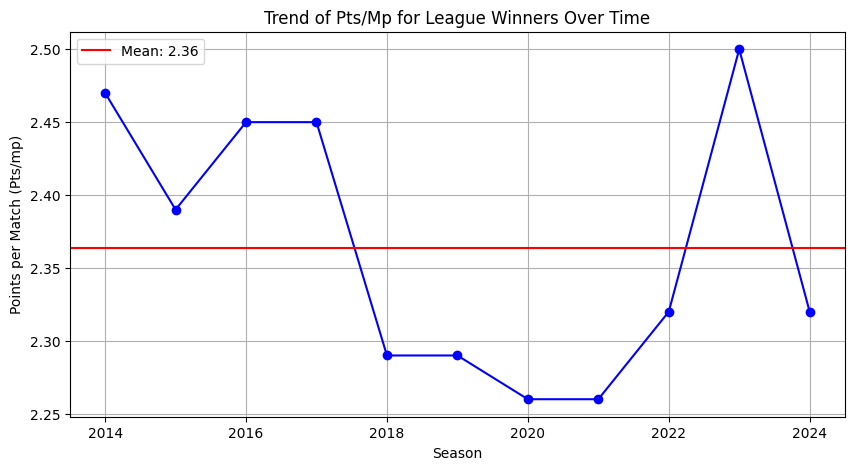

In [12]:
import matplotlib.pyplot as plt

# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10, 5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker="o", linestyle="-", color="b")
plt.axhline(y=mean_pts_mp, color='r', linestyle='-', label=f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("Season")
plt.ylabel("Points per Match (Pts/mp)")
plt.title("Trend of Pts/Mp for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

## ML Modeling & Predictions

In [13]:
from sklearn.ensemble import RandomForestClassifier # Machine learning model
from sklearn.preprocessing import StandardScaler # Tp normalize our features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss # Modela evaluation
from sklearn.model_selection import cross_val_score # For cross-validation
import pandas as pd
import numpy as np

In [14]:
# Calculate how many games each team has left to play (La Liga has 38 total games)
full_data["games_left"] = 38 - full_data["mp"]

# Estimate the final number of points if each team keeps their current pace
full_data["projected_pts"] = full_data["pts"] + full_data["games_left"] * full_data["pts/mp"]

#Create a binary column to indicate if a team was champion that season (1 = champion, 0 = not)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

In [15]:
full_data.tail(3)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,...,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts
217,18,Leganés,38,9,13,16,39,56,-17,40,...,Marko Dmitrović,Relegated,2024,36.0,59.4,-23.4,-0.62,0,0,40.0
218,19,Las Palmas,38,8,8,22,40,61,-21,32,...,Jasper Cillessen,Relegated,2024,36.3,66.8,-30.5,-0.80,0,0,32.0
219,20,Valladolid,38,4,4,30,26,90,-64,16,...,Karl Jakob Hein,Relegated,2024,34.6,67.6,-33.0,-0.87,0,0,16.0


In [16]:
# Define the features (inputs) the model will use
features = ["pts/mp", "gd", "w", "l", "projected_pts"]

# Create training data: all seasons before 2024
df_train = full_data[full_data["season"] < 2024]

# Create testing data: only the 2024 season (current one)
df_test = full_data[full_data["season"] == 2024].copy()

# Define features matrix (X) and target variable (y)
X_train = df_train[features]
y_train = df_train["is_champion"]
x_test = df_test[features]

In [17]:
# Initialize the model with 200 tress anda a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Predict binary outcomes (0 or 1) on training set
train_preds = model.predict(X_train)

# predict probalities of being champion
train_probs = model.predict_proba(X_train)[:, 1] # Only the prob of class1

In [19]:
# Compute accuracy
accuracy = accuracy_score(y_train, train_preds)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_train, train_probs)

# Compute log loss (lower is better)
log_loss = log_loss(y_train, train_probs)

# Print performance metrics
print(f"\nModel Performance on Training Data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Log Loss: {log_loss:.3f}")

# Print detailed classification performance
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# Show confusion matrix (true vs predicted values)
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))


Model Performance on Training Data
Accuracy: 1.000
ROC AUC: 1.000
Log Loss: 0.014

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[190   0]
 [  0  10]]


- Precision: Out of all the times the model said "yes", how many times was it right?

- Recall: Out of all the actual "yes" cases, how many did the model catch?

- F1-score: A mix of precision and recall in one number.

- Support: The number of actual cases for each class (label) in your data.

- Confusion Matrix: A table that shows what the model got right and wrong

In [20]:
# predict probability of becoming champion
df_test["win_probability"] = model.predict_proba(x_test)[:, 1]

# Nomalize the probabilities so that all teams add up to 100%
df_test["win_probability (%)"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100

# Round the values for better readability
df_test["win_probability (%)"] = df_test["win_probability (%)"].round(3) 


In [21]:
# Sort the test DataFrame by win probability descending
df_test = df_test.sort_values("projected_pts", ascending=False)
print("\nChampionship Win Probabilities (2024):")
df_test[["squad", "pts", "projected_pts", "pts/mp", "gd", "games_left", "win_probability (%)"]]


Championship Win Probabilities (2024):


,squad,pts,projected_pts,pts/mp,gd,games_left,win_probability (%)
200,Barcelona,88,88.0,2.32,63,0,86.164
201,Real Madrid,84,84.0,2.21,40,0,13.836
202,Atlético Madrid,76,76.0,2.00,38,0,0.000
203,Athletic Club,70,70.0,1.84,25,0,0.000
204,Villarreal,70,70.0,1.84,20,0,0.000
205,Betis,60,60.0,1.58,7,0,0.000
206,Celta Vigo,55,55.0,1.45,2,0,0.000
207,Rayo Vallecano,52,52.0,1.37,-4,0,0.000
208,Osasuna,52,52.0,1.37,-4,0,0.000
209,Mallorca,48,48.0,1.26,-9,0,0.000


In [22]:
import plotly.express as px

# Sort by projected_pts (descending)
df_test_sorted = df_test.sort_values("projected_pts", ascending=False)

# Plot bar chart
fig = px.bar(
    df_test_sorted,
    x="squad",
    y="win_probability (%)",
    color_discrete_sequence=["#1f77b4"],
    title="Championship Win Probabilities (2024 Season)",
    labels={"squad": "Team", "win_probability (%)": "Win Probability (%)"},
    template="plotly_white"
)

# Improve layout
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Win Probability (%)",
    xaxis_tickangle=-45,
    bargap=0.3,
    title_x=0.5
)

fig.show()


- Based on our analysis Barcelona has 86.2% chances of being the champion of Spain followed by Real Madrid 13.8%, ATM 8%,
- The 7th position for the conference league is most like gonna be Celta Vigo (based on Projected points)
- The relegated teams will most likely be 'Valladolid' and 'Las Palmas'